# HEART DISEASE PREDICTION USING LOGISTIC REGRESSION

## Introduction
World Health Organization has estimated 12 million deaths occur worldwide, every year due to Heart diseases. Half the deaths in the United States and other developed countries are due to cardio vascular diseases. The early prognosis of cardiovascular diseases can aid in making decisions on lifestyle changes in high risk patients and in turn reduce the complications. This research intends to pinpoint the most relevant/risk factors of heart disease as well as predict the overall risk using logistic regression.

In [1]:
#importing relevant libraries
import pandas as pd
import numpy as np
import statsmodels.api as sm
import scipy.stats as st
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn import preprocessing
from sklearn.metrics import confusion_matrix
import matplotlib.mlab as mlab
%matplotlib inline
plt.rc("font", size=14)
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,f1_score
from sklearn.metrics import f1_score,confusion_matrix
from sklearn.impute import KNNImputer #for treating missing values 
sn.set(style="white")
sn.set(style="whitegrid", color_codes=True)

 ## Data Quality & Missing Value Assessment

In [2]:
#getting data from an external source
url = 'https://raw.githubusercontent.com/GauravPadawe/Framingham-Heart-Study/master/framingham.csv'
heart_dataset = pd.read_csv(url,index_col=0,parse_dates=[0])
heart_dataset.head()
heart_df = heart_dataset.copy()

## Variables :

Each attribute is a potential risk factor. There are both demographic, behavioural and medical risk factors.

### Education :

shows the education level of a person

### Demographic: sex:
 male or female;(Nominal)

### age: age of the patient;
(Continuous - Although the recorded ages have been truncated to whole numbers, the concept of age is continuous)
Behavioural

### currentSmoker: 
whether or not the patient is a current smoker (Nominal)

### cigsPerDay: 
the number of cigarettes that the person smoked on average in one day.(can be considered continuous as one can have any number of cigarretts, even half a cigarette.)

## Medical( history):

### BPMeds: 
whether or not the patient was on blood pressure medication (Nominal)

### prevalentStroke: 
whether or not the patient had previously had a stroke (Nominal)

### prevalentHyp:
whether or not the patient was hypertensive (Nominal)

### diabetes: 
whether or not the patient had diabetes (Nominal)

## Medical(current):

### totChol:
total cholesterol level (Continuous)

### sysBP: 
systolic blood pressure (Continuous)

### diaBP:
diastolic blood pressure (Continuous)

### BMI: 
Body Mass Index (Continuous)

### heartRate: 
heart rate (Continuous - In medical research, variables such as heart rate though in fact discrete, yet are considered continuous because of large number of possible values.)

### glucose:
glucose level (Continuous)

### Predict variable (desired target):

10 year risk of coronary heart disease CHD (binary: “1”, means “Yes”, “0” means “No”)

This is your chance of having heart disease(Prob) or stroke in the next
10 years

So now we have dependent variable which is categorical in nature , so we have a classification problem 

# Data Imputation 

In [3]:
heart_df = heart_df.reset_index(level=0)
heart_df.rename(columns={'male':'Sex_male'},inplace=True)

In [4]:
heart_df.head()

,Sex_male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [5]:
heart_df.isnull().sum()

Sex_male             0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

# The Missing Data Mechanisms

- Missing Completely at Random, MCAR, means there is no relationship between the missingness of the data and any values, observed or missing. Those missing data points are a random subset of the data. There is nothing systematic going on that makes some data more likely to be missing than others.

- Missing at Random, MAR, means there is a systematic relationship between the propensity of missing values and the observed data, but not the missing data.

- Missing Not at Random, MNAR, means there is a relationship between the propensity of a value to be missing and its values. This is a case where the people with the lowest education are missing on education or the sickest people are most likely to drop out of the study.




## Dealing with missing data 
- Row deletion 
Pros - simple 
cons - it might introduce bias to the model (if i del. rows but the missing values are MAR then it might delete rows of a particular observation more)

- Mean and Median 
Pros - simple 
cons - reduces the variability of the data (which is one of our assumption )

- Hot Deck method 

Hot deck imputation involves replacing missing values of one or more variables for a non-respondent (called the recipient) with observed values from a respondent (the donor) that is similar to the non-respondent with respect to characteristics observed by both cases

## Consequences of Missing data

Missing data present various problems.
- First, the absence of data reduces statistical power, which refers to the probability that the test will reject the null hypothesis when it is false. 
- Second, the lost data can cause bias in the estimation of parameters. 
- Third, it can reduce the representativeness of the samples

In [6]:
conda install -c conda-forge missingno

Solving environment: ...working... done

# All requested packages already installed.

Retrieving notices: ...working... done

Note: you may need to restart the kernel to use updated packages.


In [7]:
pip install missingno

Note: you may need to restart the kernel to use updated packages.


In [8]:
import missingno as msno

<AxesSubplot:>

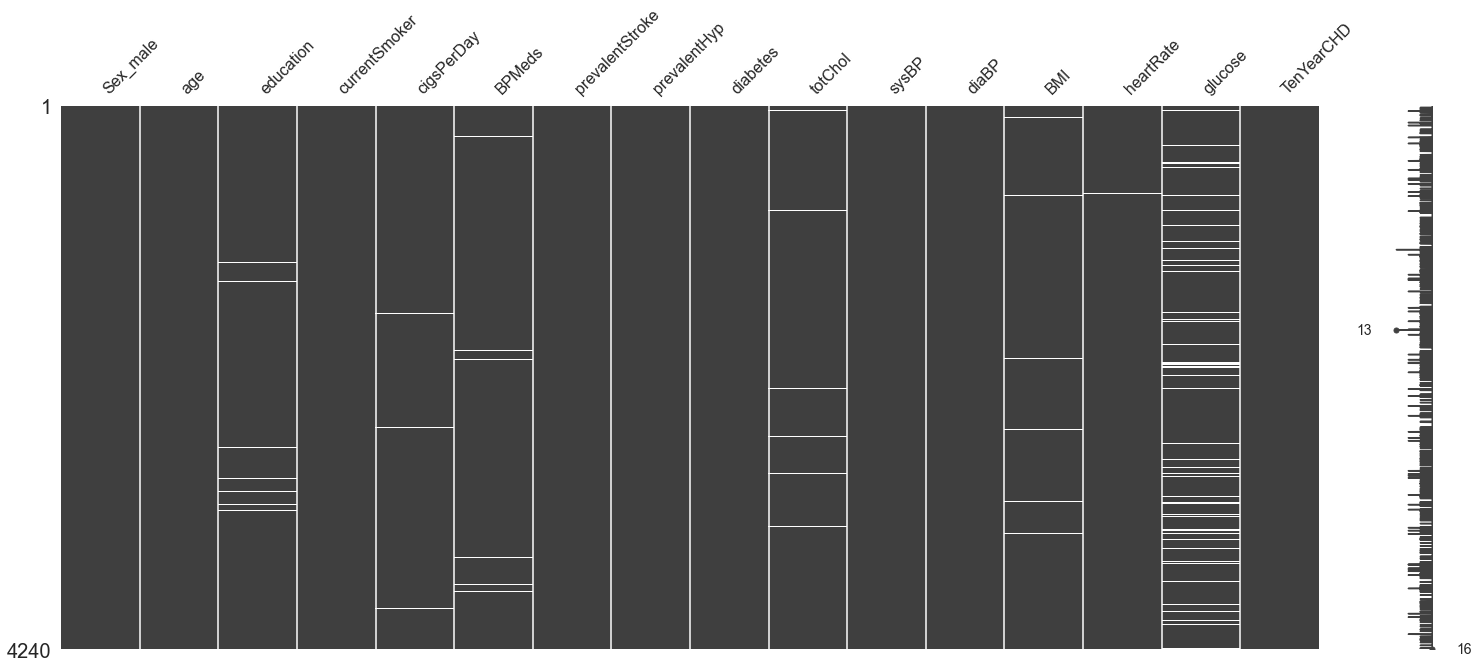

In [9]:
msno.matrix(heart_df)

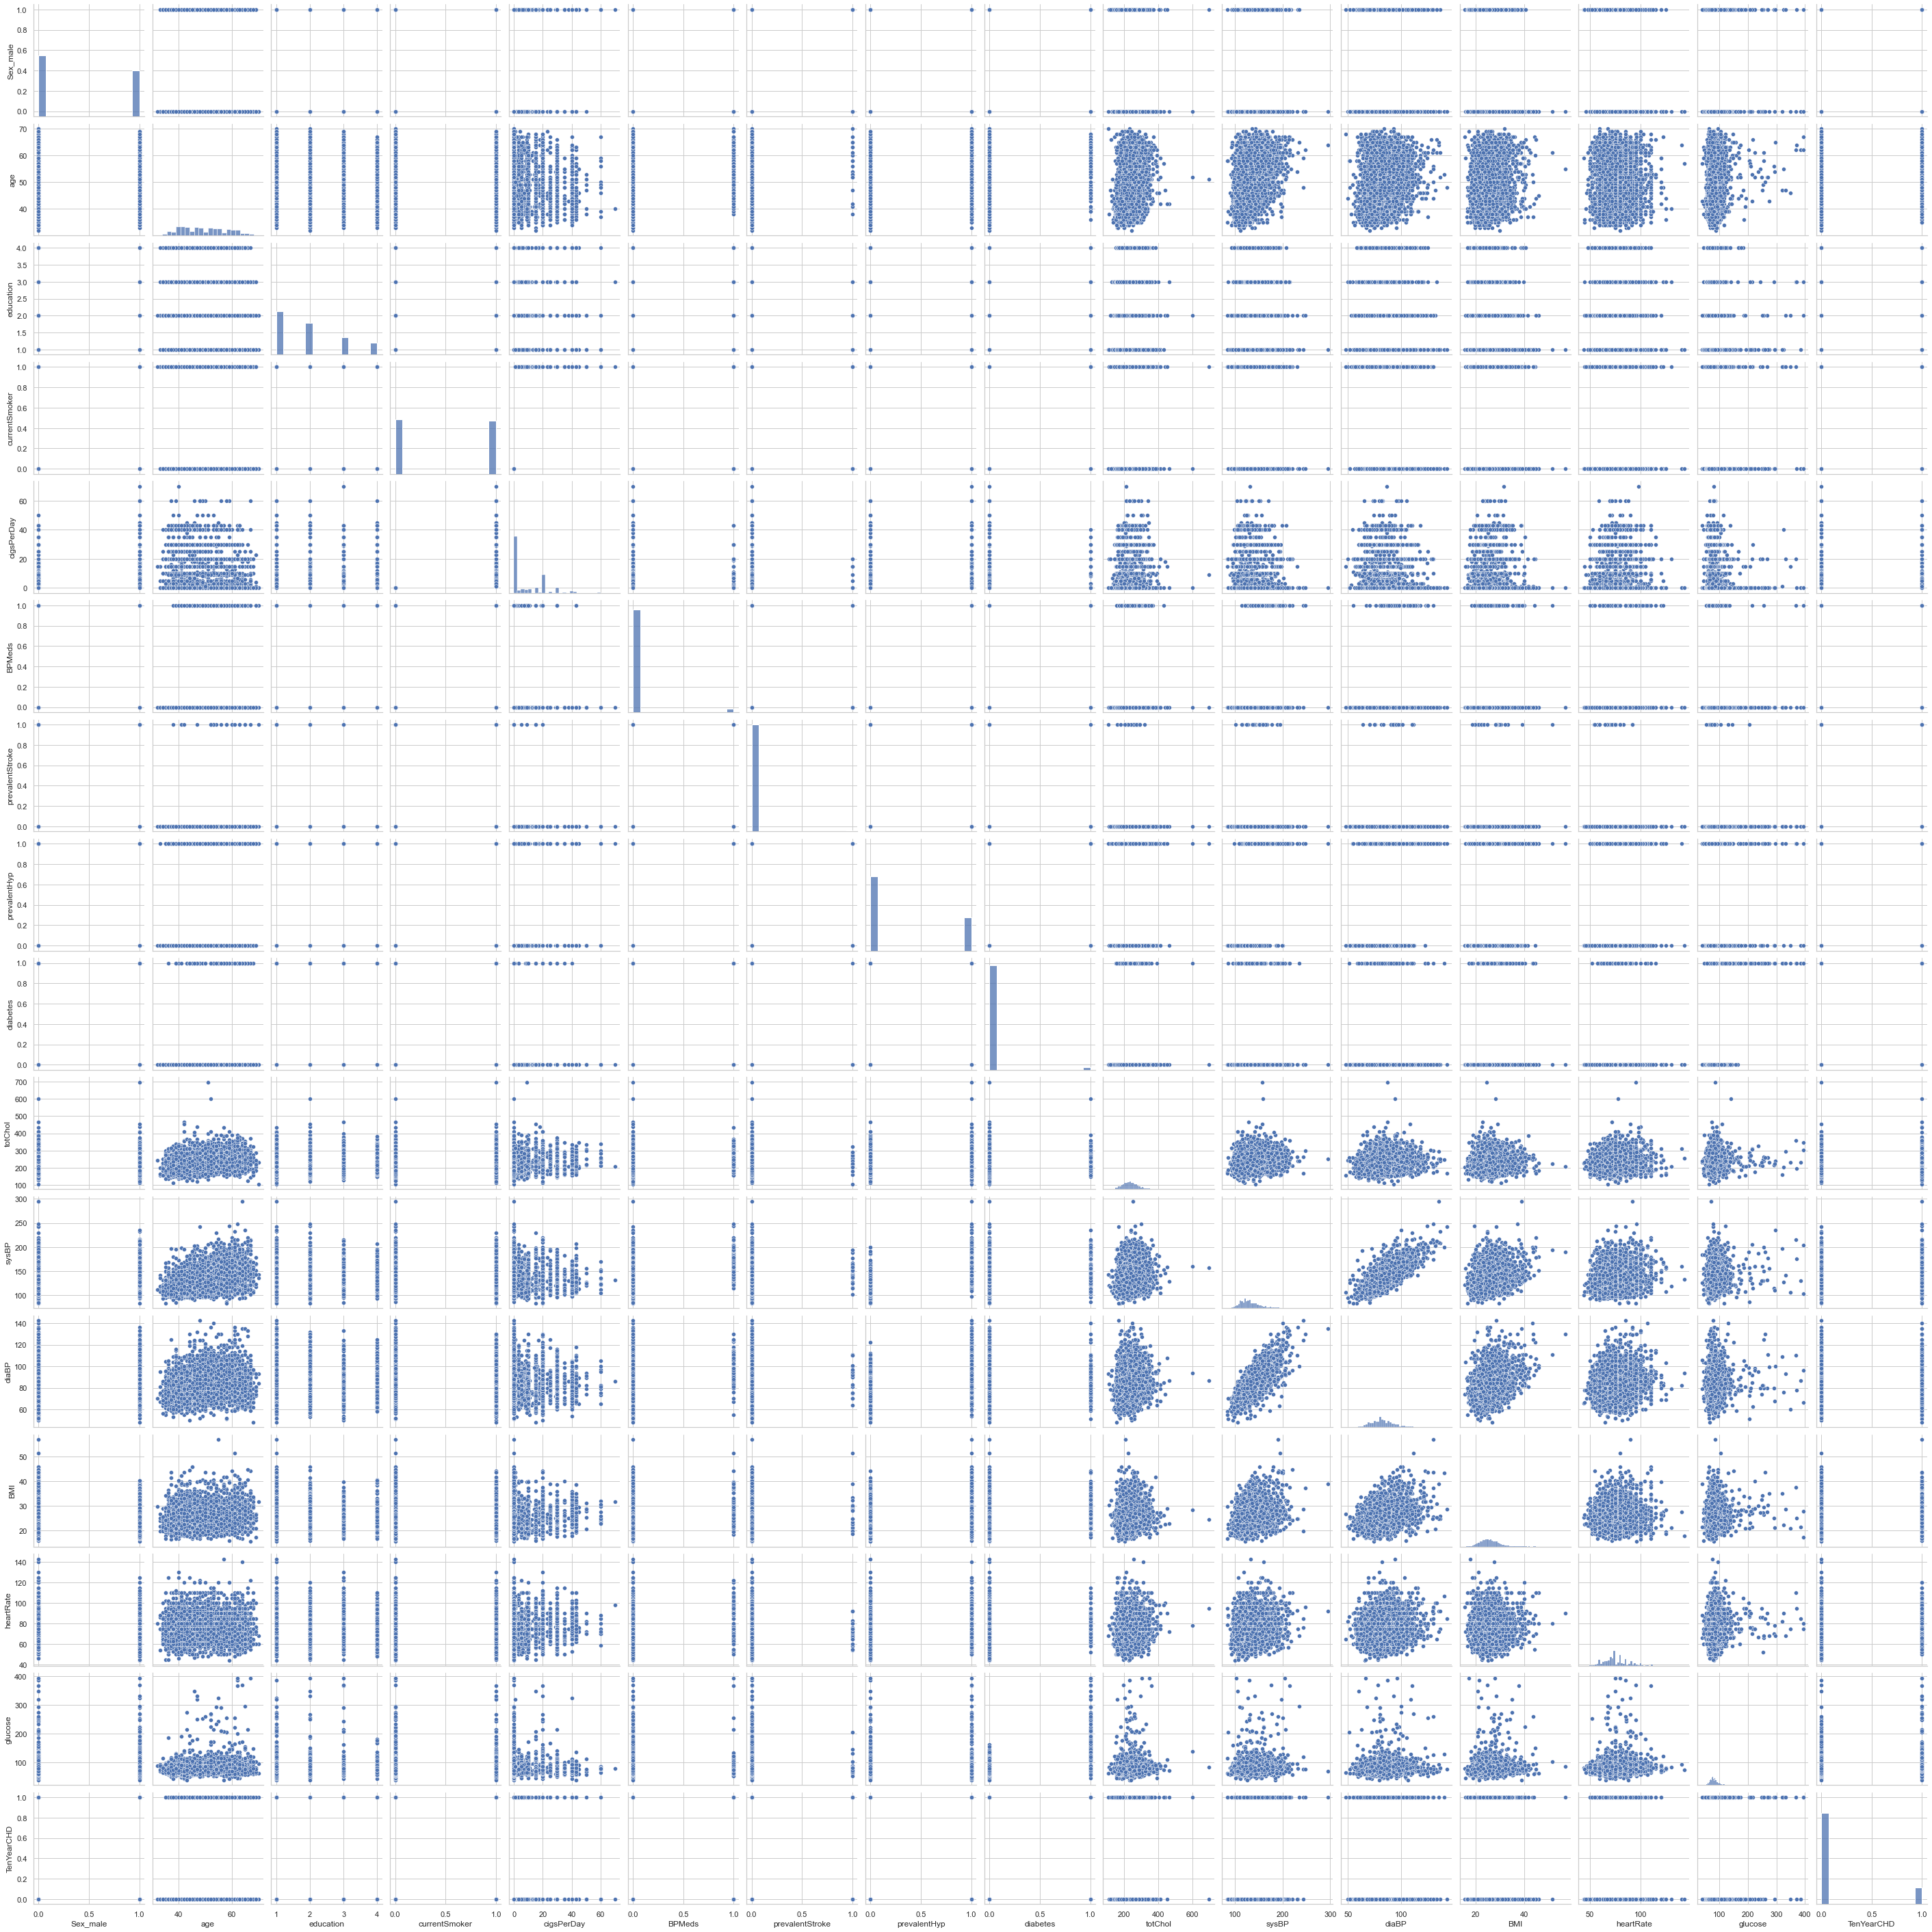

In [10]:
sn.pairplot(heart_df)

 ## Education  - Missing Values

In [11]:
heart_df['education'].isnull().sum()

105

In [12]:
# percent of missing "Education" 
print('Percent of missing "Education" records is %.2f%%' %((heart_df['education'].isnull().sum()/heart_df.shape[0])*100))

Percent of missing "Education" records is 2.48%


~2.48% of entries for passenger age are missing. Let's see what the 'Age' variable looks like in general.

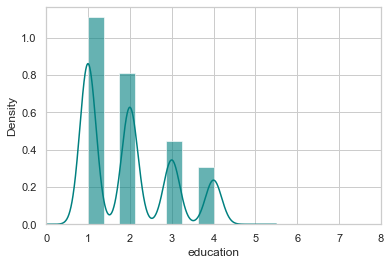

In [13]:
ax = heart_df["education"].hist(bins=8, density=True, stacked=True, color='teal', alpha=0.6)
heart_df["education"].plot(kind='density', color='teal')
ax.set(xlabel='education')
plt.xlim(0,8)
plt.show()

Since the education is right skewed , we cant use the mean to replace the missing value

If the datatype of the column is numerical then replace the values with Mean in case of Normal distribution and Median imputatation in case of Skewed distribution. If the datatype of the column is Categorical then the Mode Imputation method is the appropriate method

In [14]:
heart_df["education"].fillna(heart_df["education"].median(skipna=True), inplace=True)

In [15]:
# mean education level
print('The mean of "education" is %.2f' %(heart_df["education"].mean(skipna=True)))
# median age
print('The median of "education" is %.2f' %(heart_df["education"].median(skipna=True)))

The mean of "education" is 1.98
The median of "education" is 2.00


## cigsPerDay - Missing values

In [16]:
# percent of missing "cigsPerday" 
print('Percent of missing "cigsPerday" records is %.2f%%' %((heart_df['cigsPerDay'].isnull().sum()/heart_df.shape[0])*100))

Percent of missing "cigsPerday" records is 0.68%


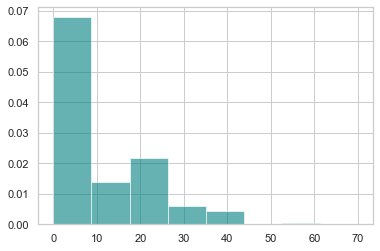

In [17]:
ax = heart_df["cigsPerDay"].hist(bins=8, density=True, stacked=True, color='teal', alpha=0.6)

There are only 2 (0.68%) missing values for "cigsPerDay", so we can just impute with the median value


Text(0.5, 1.0, 'l')

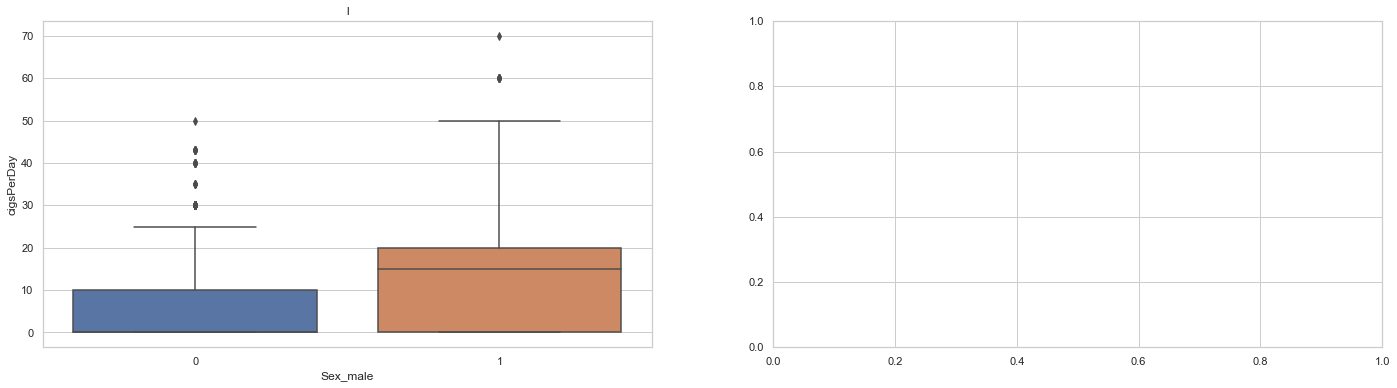

In [18]:
f, axes = plt.subplots(ncols=2, figsize=(24,6))

sn.boxplot(x= "Sex_male", y= "cigsPerDay", data=heart_df, ax=axes[0])
axes[0].set_title('l')

In [19]:
from sklearn.impute import KNNImputer

imputer = KNNImputer(n_neighbors=3, weights="uniform")

heart_df['cigsPerDay'] = imputer.fit_transform(heart_df[['cigsPerDay']])



As we can clearly see females have a lower rate of having cigs per day than male so we'll replace the values  using KNN imputer method.

This imputer utilizes the k-Nearest Neighbors method to replace the missing values in the datasets with the mean value from the parameter ‘n_neighbors’ nearest neighbors found in the training set. By default, it uses a Euclidean distance metric to impute the missing values



so basically we could see that missing values were not completely random , so we wanted the missing values to be replaced by observed values which were similar to non observed 

## glucose - Missing values

In [20]:
# percent of missing "glucose" 
print('Percent of missing "glucose" records is %.2f%%' %((heart_df['glucose'].isnull().sum()/heart_df.shape[0])*100))

Percent of missing "glucose" records is 9.15%


So the % of missing values in glucose is high , lets see what it looks like 


Text(0.5, 1.0, 'l')

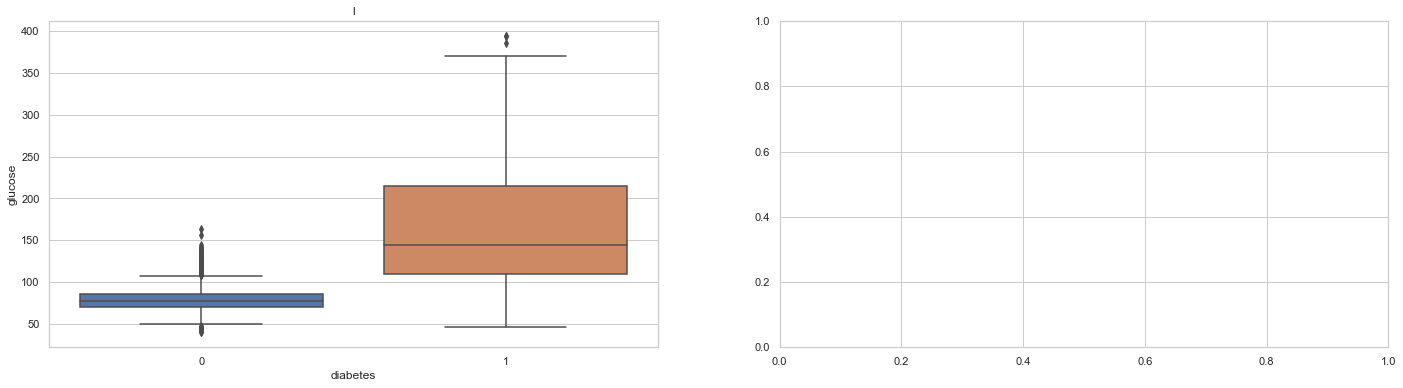

In [21]:
f, axes = plt.subplots(ncols=2, figsize=(24,6))

sn.boxplot(x= "diabetes", y= "glucose", data=heart_df, ax=axes[0])
axes[0].set_title('l')

In [22]:

imputer = KNNImputer(n_neighbors=3, weights="uniform")

heart_df['glucose'] = imputer.fit_transform(heart_df[['glucose']])

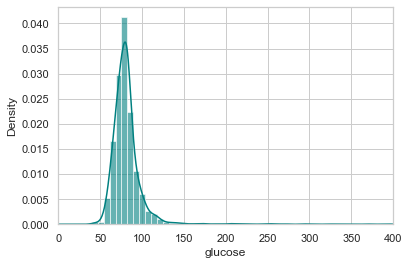

In [23]:
ax = heart_df["glucose"].hist( bins=50,density=True, stacked=True, color='teal', alpha=0.6)
heart_df["glucose"].plot(kind='density', color='teal')
ax.set(xlabel='glucose')
plt.xlim(0,400)
plt.show()

We can most of the values are concentrated around the mean(as it shows a normal distribution) , so we can replace the missing value with the mean 

## totCHOL - Missing values


In [24]:
imputer = KNNImputer(n_neighbors=3, weights="uniform")

heart_df['totChol'] = imputer.fit_transform(heart_df[['totChol']])

## BMI missing values

In [25]:
imputer = KNNImputer(n_neighbors=3, weights="uniform")

heart_df['BMI'] = imputer.fit_transform(heart_df[['BMI']])

## BPMeds missing values

In [26]:
imputer = KNNImputer(n_neighbors=3, weights="uniform")

heart_df['BPMeds'] = imputer.fit_transform(heart_df[['BPMeds']])

## Heart rate missing values

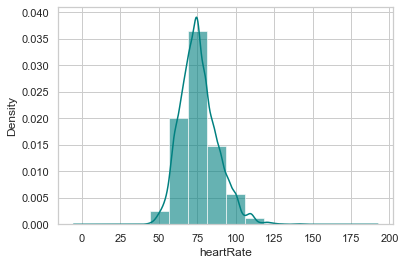

In [27]:
ax = heart_df["heartRate"].hist(bins=8, density=True, stacked=True, color='teal', alpha=0.6)
heart_df["heartRate"].plot(kind='density', color='teal')
ax.set(xlabel='heartRate')

plt.show()

In [28]:
heart_df["heartRate"].fillna(heart_df["heartRate"].median(skipna=True), inplace=True)

In [29]:
#preview adjusted data
heart_df.isnull().sum()

Sex_male           0
age                0
education          0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

In [30]:
heart_dataset.head()

,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
male,,,,,,,,,,,,,,,
1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


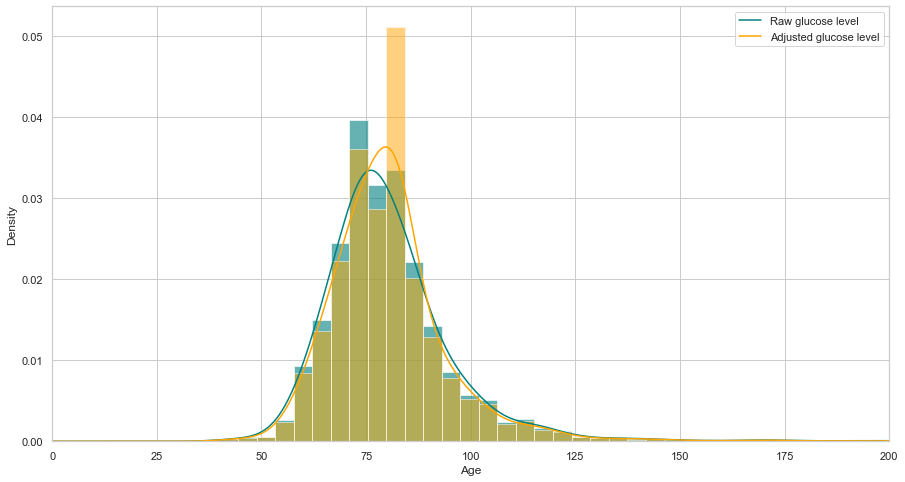

In [31]:
#comparing adjusted glucose level and raw glucose level 

plt.figure(figsize=(15,8))
ax = heart_dataset["glucose"].hist(bins=80, density=True, stacked=True, color='teal', alpha=0.6)
heart_dataset["glucose"].plot(kind='density', color='teal')
ax = heart_df["glucose"].hist(bins=80, density=True, stacked=True, color='orange', alpha=0.5)
heart_df["glucose"].plot(kind='density', color='orange')
ax.legend(['Raw glucose level', 'Adjusted glucose level'])
ax.set(xlabel='Age')
plt.xlim(0,200)
plt.show()

As we can see the data is concentrated around the mean now 

# Exploratory Analysis

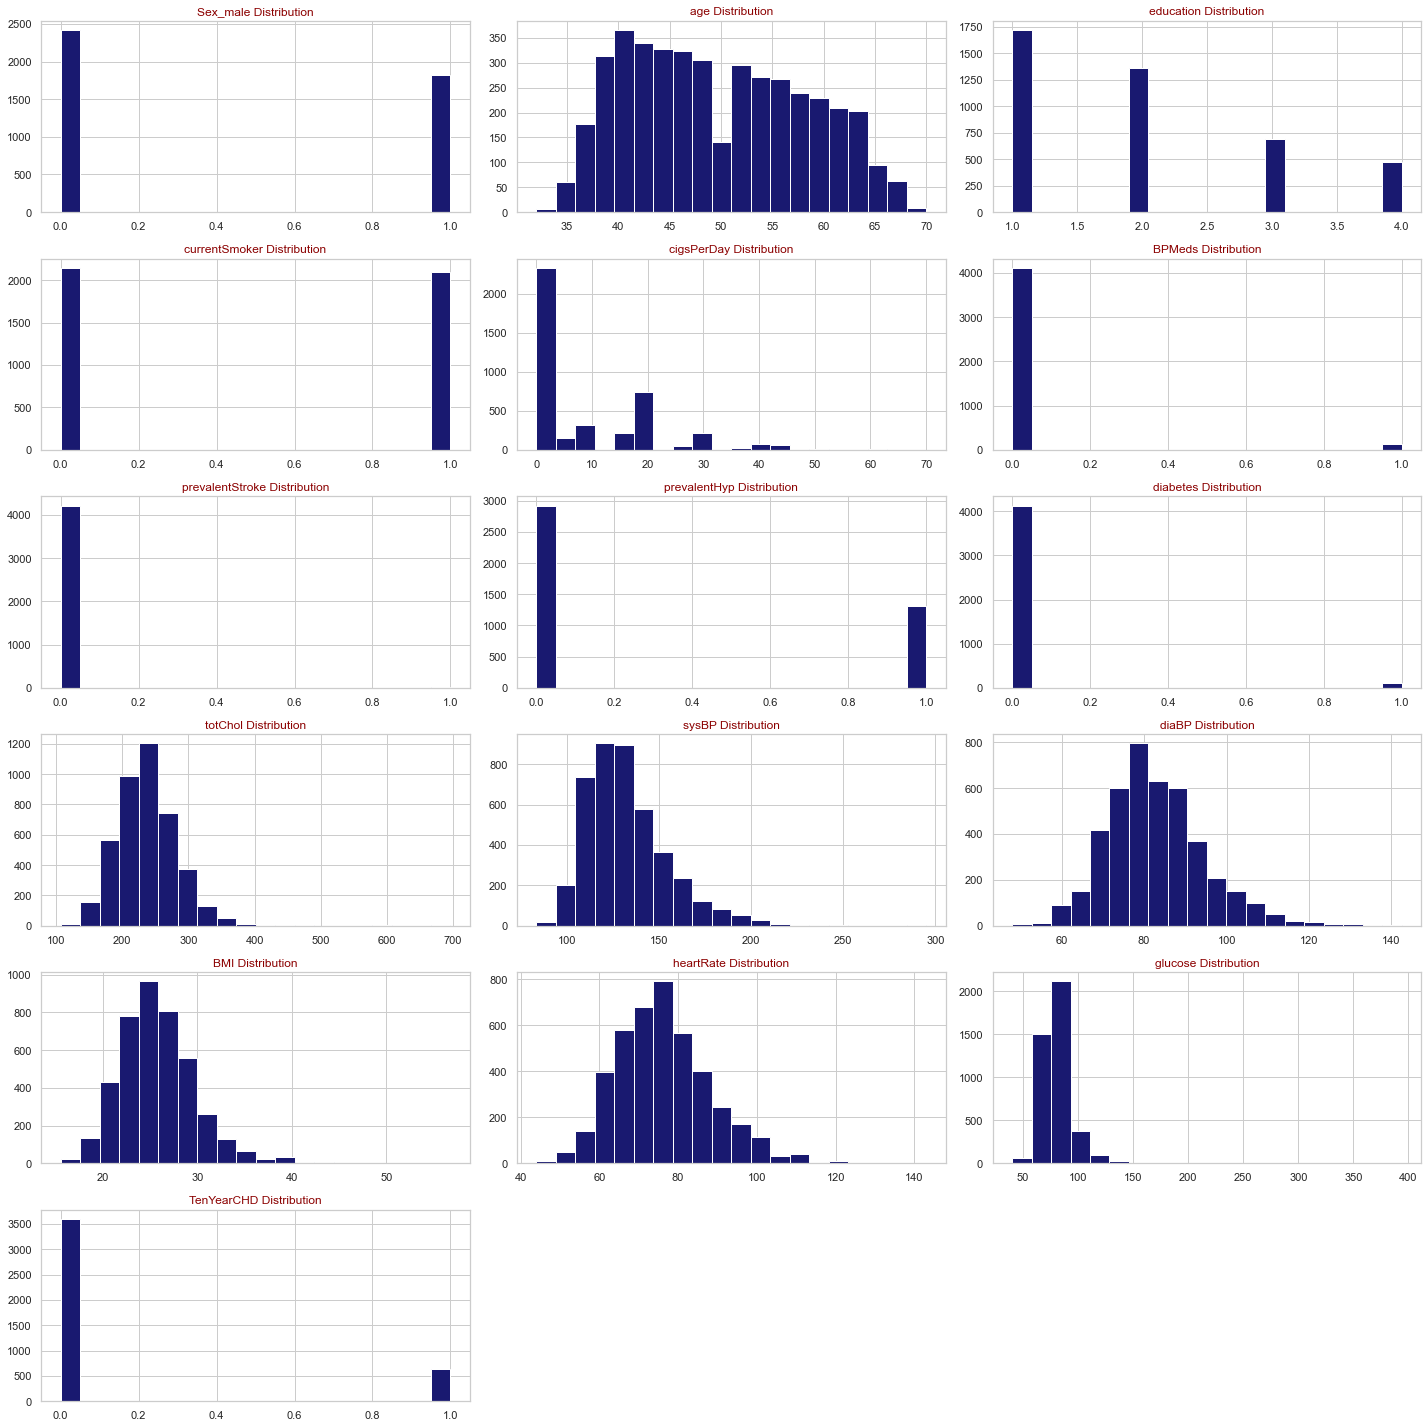

In [32]:
def draw_histograms(dataframe, features, rows, cols):
    fig=plt.figure(figsize=(20,20))
    for i, feature in enumerate(features):
        ax=fig.add_subplot(rows,cols,i+1)
        dataframe[feature].hist(bins=20,ax=ax,facecolor='midnightblue')
        ax.set_title(feature+" Distribution",color='DarkRed')
        
    fig.tight_layout()  
    plt.show()
draw_histograms(heart_df,heart_df.columns,6,3)

## Detecting outliers - 

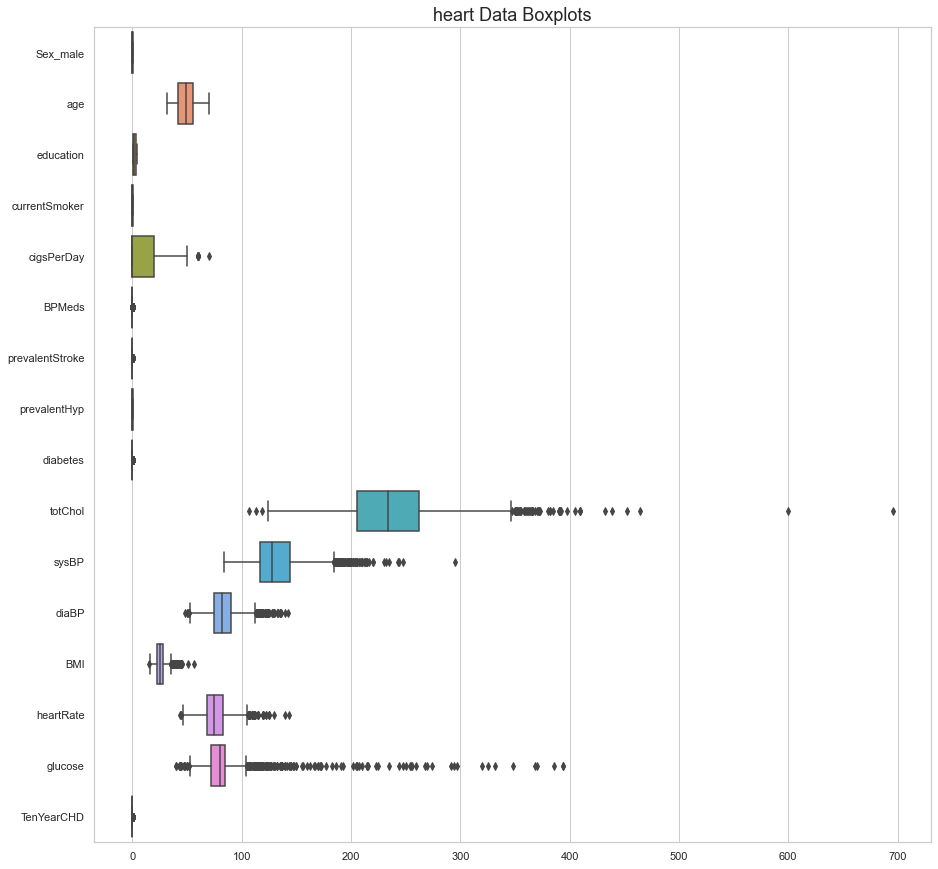

In [33]:
# Plotting Boxplots of the numerical features

plt.figure(figsize = (15,15))
ax =sn.boxplot(data = heart_df, orient="h")
ax.set_title('heart Data Boxplots', fontsize = 18)

plt.show()

Observations - 

1. totChol and glucose have high number of outliers 

We can deal with them using the fencing method 

In [34]:
heart_df

,Sex_male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.000000,0,0,0,195.0,106.0,70.0,26.97,80.0,77.000000,0
1,0,46,2.0,0,0.0,0.000000,0,0,0,250.0,121.0,81.0,28.73,95.0,76.000000,0
2,1,48,1.0,1,20.0,0.000000,0,0,0,245.0,127.5,80.0,25.34,75.0,70.000000,0
3,0,61,3.0,1,30.0,0.000000,0,1,0,225.0,150.0,95.0,28.58,65.0,103.000000,1
4,0,46,3.0,1,23.0,0.000000,0,0,0,285.0,130.0,84.0,23.10,85.0,85.000000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4235,0,48,2.0,1,20.0,0.029615,0,0,0,248.0,131.0,72.0,22.00,84.0,86.000000,0
4236,0,44,1.0,1,15.0,0.000000,0,0,0,210.0,126.5,87.0,19.16,86.0,81.963655,0
4237,0,52,2.0,0,0.0,0.000000,0,0,0,269.0,133.5,83.0,21.47,80.0,107.000000,0
4238,1,40,3.0,0,0.0,0.000000,0,1,0,185.0,141.0,98.0,25.60,67.0,72.000000,0


## Dealing with outliers

In [35]:
pip install outlier_utils


Note: you may need to restart the kernel to use updated packages.


## we will use fencing method to detect outliers

We can use the interquartile range (IQR), several quartile values, and an adjustment factor to calculate boundaries for what constitutes minor and major outliers. Minor and major denote the unusualness of the outlier relative to the overall distribution of values. Major outliers are more extreme

In [36]:
def outliers_removal(feature,feature_name,dataset):
    
    # Identify 25th & 75th quartiles

    q25, q75 = np.percentile(feature, 25), np.percentile(feature, 75)
    print('Quartile 25: {} | Quartile 75: {}'.format(q25, q75))
    feat_iqr = q75 - q25
    print('iqr: {}'.format(feat_iqr))
    
    feat_cut_off = feat_iqr * 1.5
    feat_lower, feat_upper = q25 - feat_cut_off, q75 + feat_cut_off
    print('Cut Off: {}'.format(feat_cut_off))
    print(feature_name +' Lower: {}'.format(feat_lower))
    print(feature_name +' Upper: {}'.format(feat_upper))
    
    outliers = [x for x in feature if x < feat_lower or x > feat_upper]
    print(feature_name + ' outliers : {}'.format(len(outliers)))
    #print(feature_name + ' outliers:{}'.format(outliers))

    dataset = dataset.drop(dataset[(dataset[feature_name] > feat_upper) | (dataset[feature_name] < feat_lower)].index)
    print('-' * 65)
    
    return dataset

for col in heart_df.loc[:,"Sex_male":"glucose"]:
    heart_d2 = outliers_removal(heart_df[col],str(col),heart_df.loc[:,"Sex_male":"glucose"])

Quartile 25: 0.0 | Quartile 75: 1.0
iqr: 1.0
Cut Off: 1.5
Sex_male Lower: -1.5
Sex_male Upper: 2.5
Sex_male outliers : 0
-----------------------------------------------------------------
Quartile 25: 42.0 | Quartile 75: 56.0
iqr: 14.0
Cut Off: 21.0
age Lower: 21.0
age Upper: 77.0
age outliers : 0
-----------------------------------------------------------------
Quartile 25: 1.0 | Quartile 75: 3.0
iqr: 2.0
Cut Off: 3.0
education Lower: -2.0
education Upper: 6.0
education outliers : 0
-----------------------------------------------------------------
Quartile 25: 0.0 | Quartile 75: 1.0
iqr: 1.0
Cut Off: 1.5
currentSmoker Lower: -1.5
currentSmoker Upper: 2.5
currentSmoker outliers : 0
-----------------------------------------------------------------
Quartile 25: 0.0 | Quartile 75: 20.0
iqr: 20.0
Cut Off: 30.0
cigsPerDay Lower: -30.0
cigsPerDay Upper: 50.0
cigsPerDay outliers : 12
-----------------------------------------------------------------
Quartile 25: 0.0 | Quartile 75: 0.0
iqr: 0.0


In [37]:
heart_d2

,Sex_male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose
0,1,39,4.0,0,0.0,0.000000,0,0,0,195.0,106.0,70.0,26.97,80.0,77.000000
1,0,46,2.0,0,0.0,0.000000,0,0,0,250.0,121.0,81.0,28.73,95.0,76.000000
2,1,48,1.0,1,20.0,0.000000,0,0,0,245.0,127.5,80.0,25.34,75.0,70.000000
3,0,61,3.0,1,30.0,0.000000,0,1,0,225.0,150.0,95.0,28.58,65.0,103.000000
4,0,46,3.0,1,23.0,0.000000,0,0,0,285.0,130.0,84.0,23.10,85.0,85.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4234,1,51,3.0,1,43.0,0.000000,0,0,0,207.0,126.5,80.0,19.71,65.0,68.000000
4235,0,48,2.0,1,20.0,0.029615,0,0,0,248.0,131.0,72.0,22.00,84.0,86.000000
4236,0,44,1.0,1,15.0,0.000000,0,0,0,210.0,126.5,87.0,19.16,86.0,81.963655
4238,1,40,3.0,0,0.0,0.000000,0,1,0,185.0,141.0,98.0,25.60,67.0,72.000000


In [38]:
heart_d2[heart_d2.index.duplicated()]

,Sex_male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose


In [39]:
heart_d2['TenYearCHD'] = heart_df['TenYearCHD']

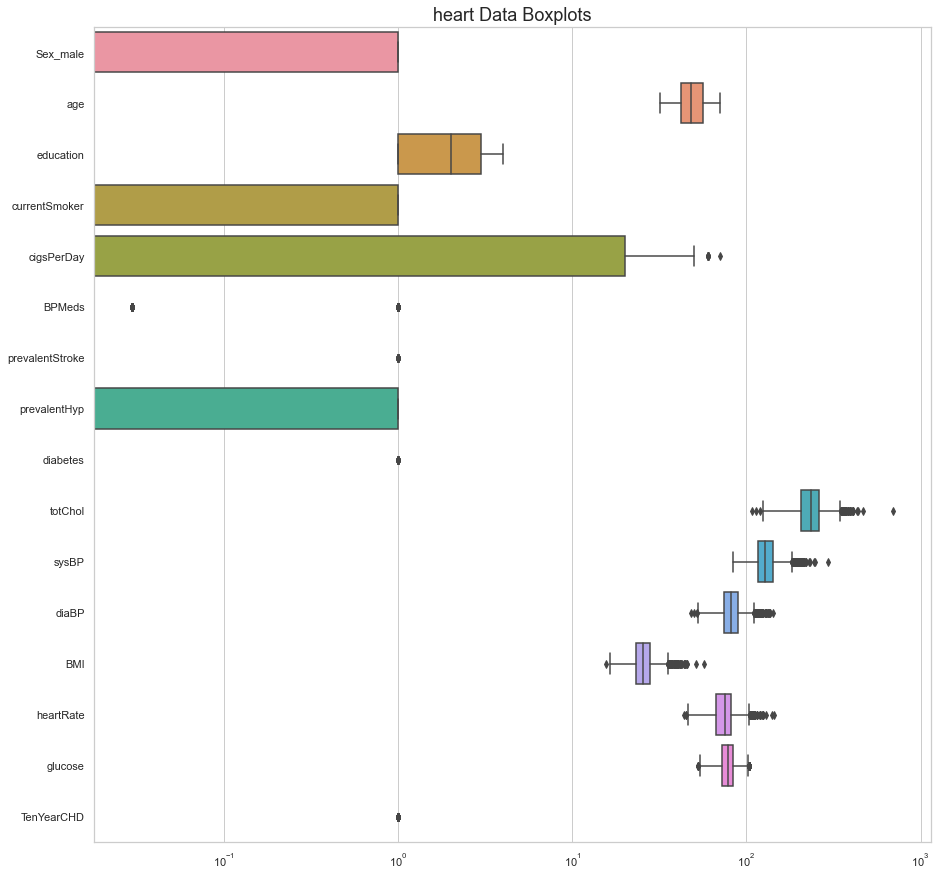

In [40]:
# Plotting Boxplots of the numerical features

plt.figure(figsize = (15,15))
ax =sn.boxplot(data = heart_d2, orient="h")
ax.set_title('heart Data Boxplots', fontsize = 18)

ax.set(xscale="log")
plt.show()

Spearman's rank correlation coefficient measures the monotonic relation between variables , i.e they arrrange the variables in ordered and then measure the relation

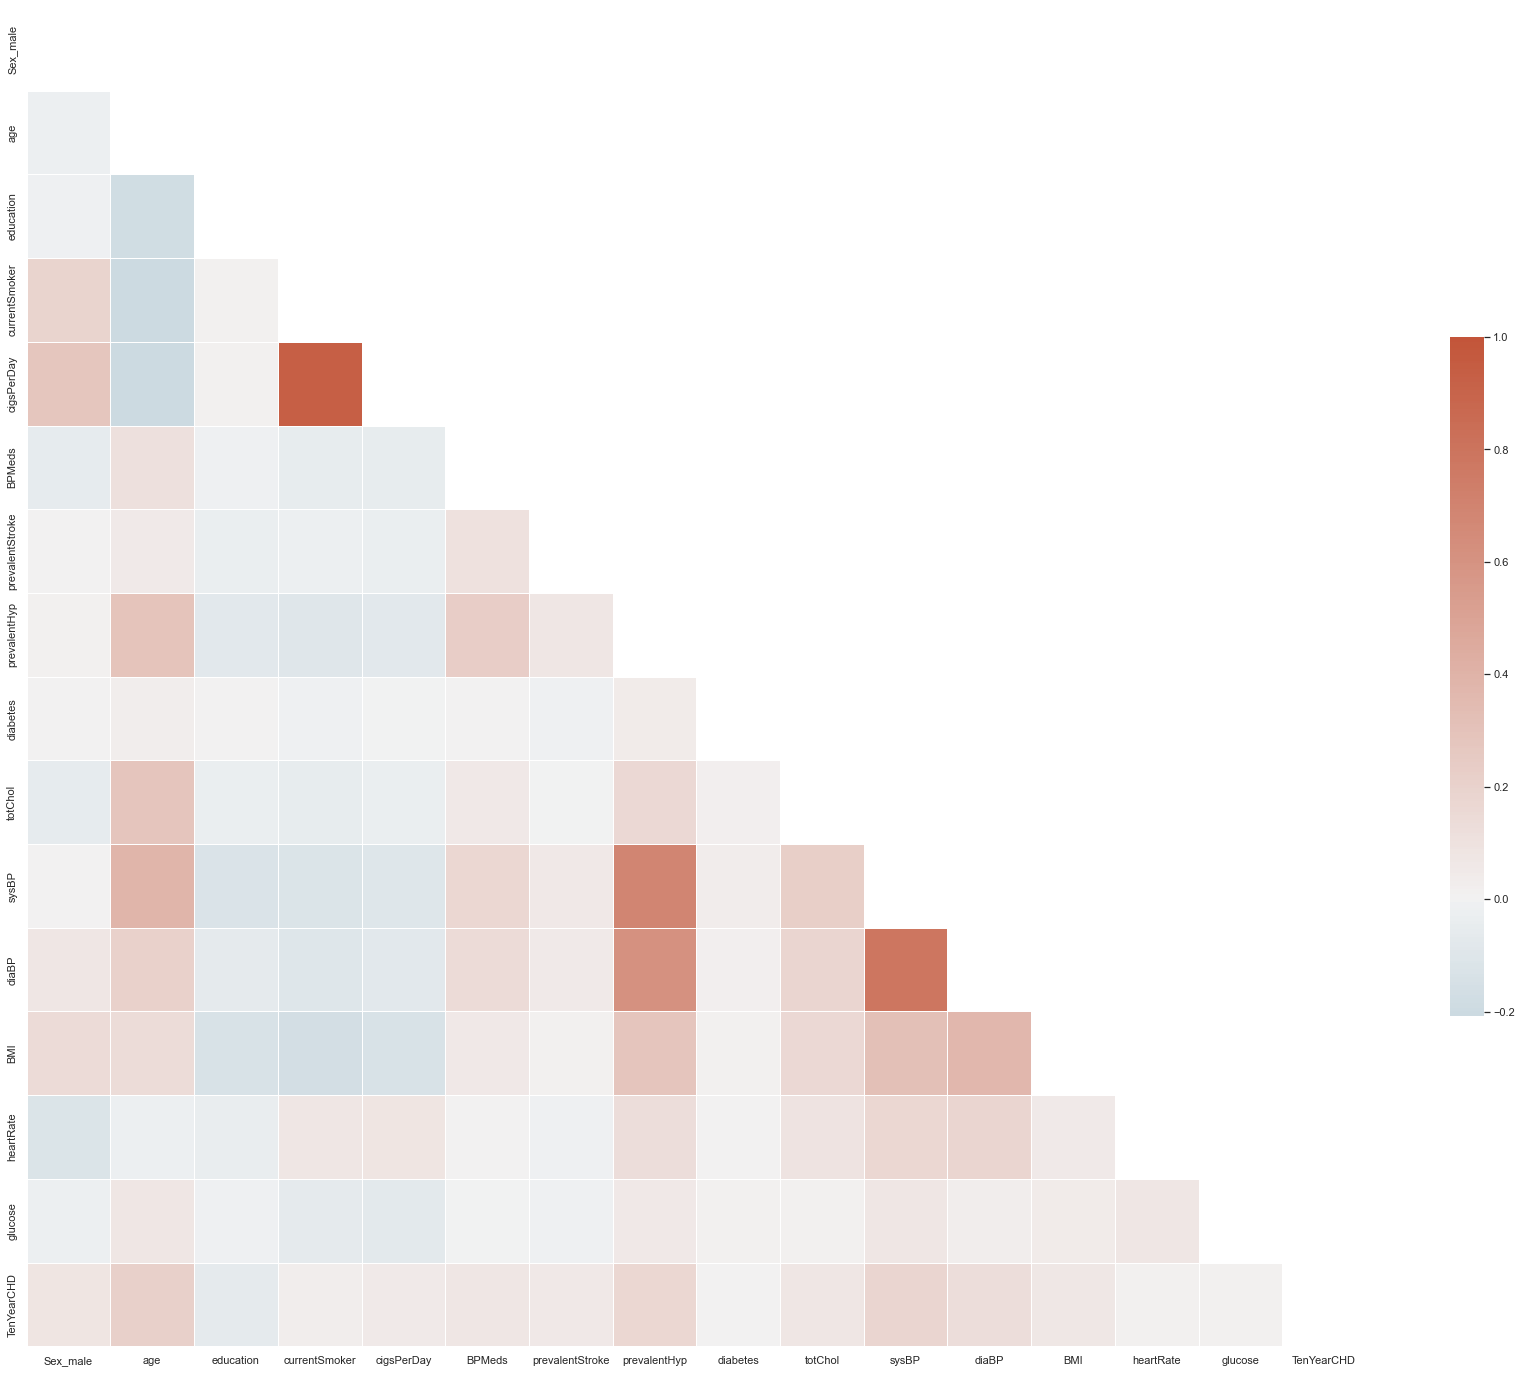

In [41]:
#Checking multicollinearity between diff features
# Correlation Heatmap (Spearman)

f, ax = plt.subplots(figsize=(30, 25))
mat = heart_d2.corr('spearman')
mask = np.triu(np.ones_like(mat, dtype=bool))
cmap = sn.diverging_palette(230, 20, as_cmap=True)
sn.heatmap(mat, mask=mask, cmap=cmap, vmax=1, center=0,# annot = True,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.show()

In [42]:
heart_d2

,Sex_male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.000000,0,0,0,195.0,106.0,70.0,26.97,80.0,77.000000,0
1,0,46,2.0,0,0.0,0.000000,0,0,0,250.0,121.0,81.0,28.73,95.0,76.000000,0
2,1,48,1.0,1,20.0,0.000000,0,0,0,245.0,127.5,80.0,25.34,75.0,70.000000,0
3,0,61,3.0,1,30.0,0.000000,0,1,0,225.0,150.0,95.0,28.58,65.0,103.000000,1
4,0,46,3.0,1,23.0,0.000000,0,0,0,285.0,130.0,84.0,23.10,85.0,85.000000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4234,1,51,3.0,1,43.0,0.000000,0,0,0,207.0,126.5,80.0,19.71,65.0,68.000000,0
4235,0,48,2.0,1,20.0,0.029615,0,0,0,248.0,131.0,72.0,22.00,84.0,86.000000,0
4236,0,44,1.0,1,15.0,0.000000,0,0,0,210.0,126.5,87.0,19.16,86.0,81.963655,0
4238,1,40,3.0,0,0.0,0.000000,0,1,0,185.0,141.0,98.0,25.60,67.0,72.000000,0


In [43]:
from sklearn.metrics import matthews_corrcoef

In [44]:
heart_d2.groupby(['diabetes','TenYearCHD']).size().unstack(fill_value=0)

TenYearCHD,0,1
diabetes,,
0,3386,569
1,19,4


In [45]:
heart_d2.groupby(['Sex_male','TenYearCHD']).size().unstack(fill_value=0)

TenYearCHD,0,1
Sex_male,,
0,2010,268
1,1395,305


In [46]:
heart_d2.groupby(['currentSmoker','TenYearCHD']).size().unstack(fill_value=0)

TenYearCHD,0,1
currentSmoker,,
0,1731,270
1,1674,303


In [47]:
heart_d2.groupby(['prevalentStroke','TenYearCHD']).size().unstack(fill_value=0)

TenYearCHD,0,1
prevalentStroke,,
0,3392,564
1,13,9


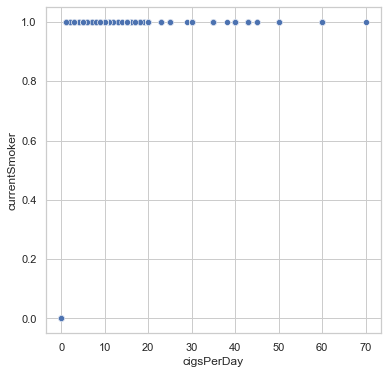

In [48]:
#plotting features which are highly correlated 
#cigsPerDay and Current smoker
plt.figure(figsize=(6, 6))
sn.scatterplot(x = 'cigsPerDay', y = 'currentSmoker', data = heart_d2) #write you code here
plt.show()

Text(0.5, 1.0, 'TenYearCHD vs cigsPerDay')

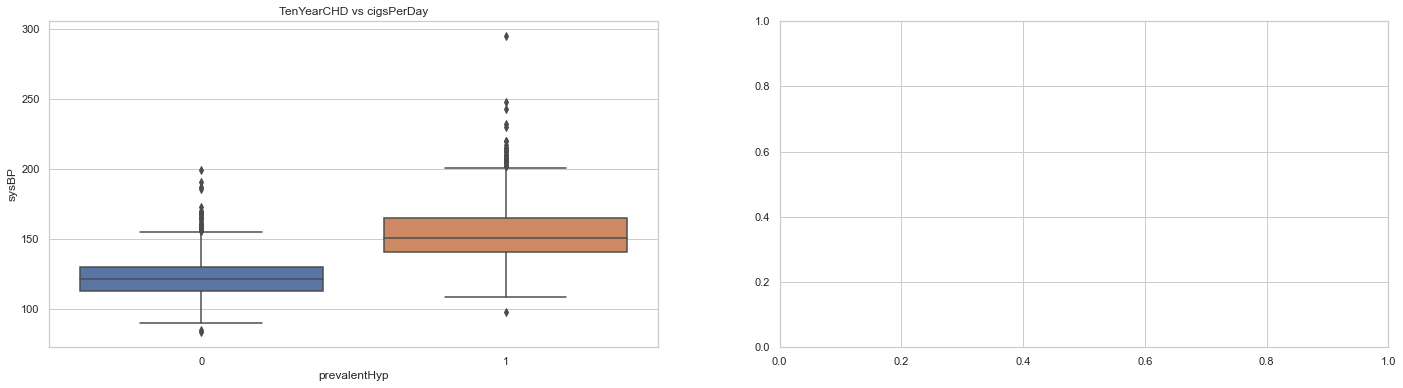

In [49]:
#Comparing SysBP and prevalentHyp as they are highly correlated
f, axes = plt.subplots(ncols=2, figsize=(24,6))

sn.boxplot(x='prevalentHyp', y="sysBP", data=heart_d2, ax=axes[0])
axes[0].set_title('TenYearCHD vs cigsPerDay')


We can clearly see people with prevelantHyp have a higher systolic BP

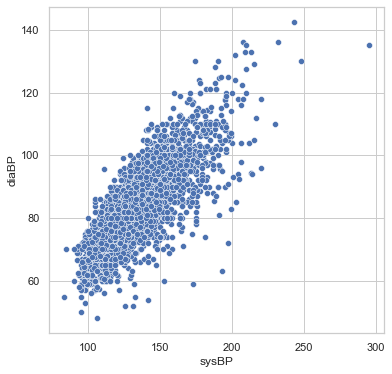

In [50]:
#Relationship between diaBP and sysBP

plt.figure(figsize=(6, 6))
sn.scatterplot(x = 'sysBP', y = 'diaBP', data = heart_d2) #write you code here
plt.show()

SysBP and diaBP  are highly correlated. We would have to treat them afterward

## 1. AGE

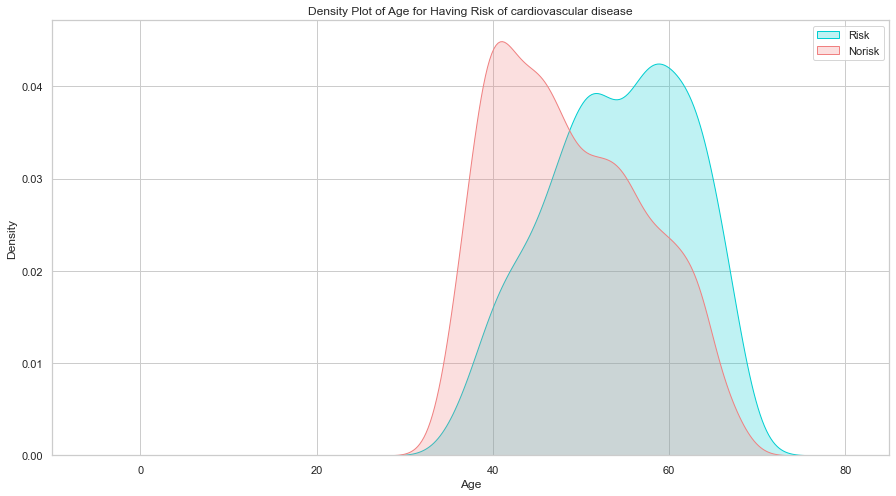

In [51]:
plt.figure(figsize=(15,8))
ax = sn.kdeplot(heart_df["age"][heart_df.TenYearCHD == 1], color="darkturquoise", shade=True)
sn.kdeplot(heart_df["age"][heart_df.TenYearCHD == 0], color="lightcoral", shade=True)
plt.legend(['Risk', 'Norisk'])
plt.title('Density Plot of Age for Having Risk of cardiovascular disease')
ax.set(xlabel='Age')
plt.xlim(-10,85)
plt.show()

## Observation - 

We can cleary see, people who are older have a higher chance of having a cardiovascular disease 

We can also use boxplot for this purpose , comparing people with risk and no risk 

In [52]:
#we can now compare the average values of the features wrt whether they have the disease or not 
#comparing using boxplot

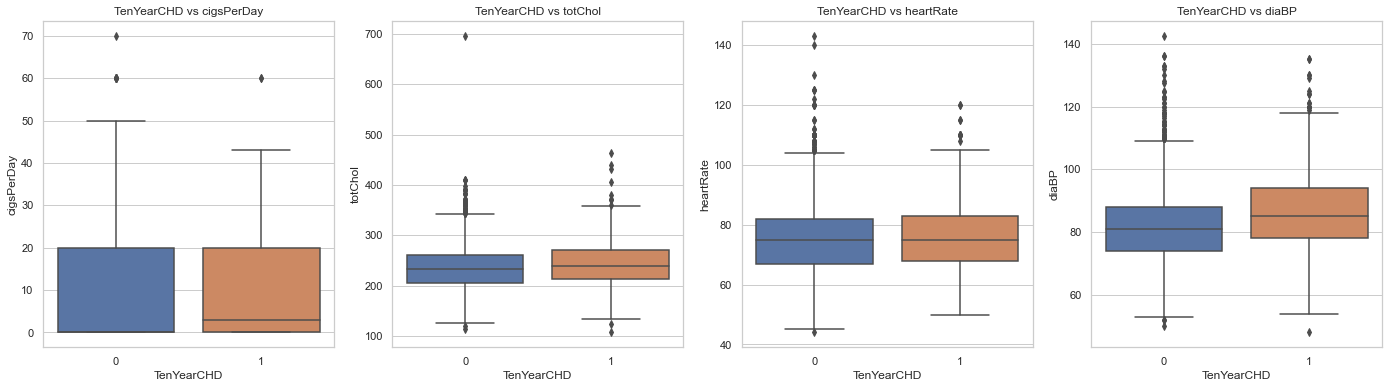

In [53]:
f, axes = plt.subplots(ncols=4, figsize=(24,6))

sn.boxplot(x='TenYearCHD', y="cigsPerDay", data=heart_d2, ax=axes[0])
axes[0].set_title('TenYearCHD vs cigsPerDay')

sn.boxplot(x='TenYearCHD', y="totChol", data=heart_d2, ax=axes[1]) 
axes[1].set_title('TenYearCHD vs totChol')


sn.boxplot(x='TenYearCHD', y="heartRate", data=heart_d2, ax=axes[2])
axes[2].set_title('TenYearCHD vs heartRate')


sn.boxplot(x='TenYearCHD', y="diaBP", data=heart_d2, ax=axes[3])  
axes[3].set_title('TenYearCHD vs diaBP') 


plt.show()

## Observations - 

1. People with risk have similar no. of  cigs per day 

2. People with heart disease have slightl higher chol.

3. People with heart disease have higher heartrate

4. People with heart disease have higher Diabp

In [54]:
#Summary Statistics 
heart_d2.describe()

,Sex_male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,3978.000000,3978.000000,3978.000000,3978.000000,3978.000000,3978.000000,3978.00000,3978.000000,3978.000000,3978.000000,3978.000000,3978.000000,3978.000000,3978.000000,3978.000000,3978.000000
mean,0.427350,49.363751,1.992459,0.496983,9.101850,0.028024,0.00553,0.300905,0.005782,236.269879,131.676596,82.715938,25.738825,75.663901,78.422549,0.144042
std,0.494756,8.544411,1.006863,0.500054,11.933684,0.163965,0.07417,0.458709,0.075828,43.818613,21.545962,11.785464,4.017385,12.027749,9.868413,0.351177
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,107.000000,83.500000,48.000000,15.540000,44.000000,53.000000,0.000000
25%,0.000000,42.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,206.000000,116.000000,74.500000,23.070000,67.250000,72.000000,0.000000
50%,0.000000,48.000000,2.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,234.000000,128.000000,82.000000,25.365000,75.000000,78.000000,0.000000
75%,1.000000,56.000000,3.000000,1.000000,20.000000,0.000000,0.00000,1.000000,0.000000,262.000000,142.500000,89.000000,27.940000,82.000000,84.000000,0.000000
max,1.000000,70.000000,4.000000,1.000000,70.000000,1.000000,1.00000,1.000000,1.000000,696.000000,295.000000,142.500000,56.800000,143.000000,104.000000,1.000000


<AxesSubplot:xlabel='TenYearCHD', ylabel='count'>

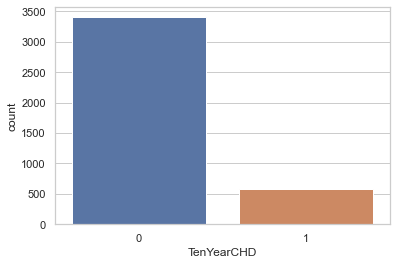

In [55]:
sn.countplot(x='TenYearCHD',data=heart_d2)

In [56]:
heart_df.TenYearCHD.value_counts()

0    3596
1     644
Name: TenYearCHD, dtype: int64

Our classes are imbalanced, and the ratio of no risk to risk  is 161:899. Before we go ahead to balance the classes, let’s do some more exploration.

In [57]:
heart_d2.groupby('TenYearCHD').mean()

,Sex_male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose
TenYearCHD,,,,,,,,,,,,,,,
0,0.409692,48.599706,2.013803,0.491630,8.801218,0.022677,0.003818,0.269604,0.005580,234.908453,129.878120,82.037445,25.628754,75.563583,78.348228
1,0.532286,53.904014,1.865620,0.528796,10.888328,0.059802,0.015707,0.486911,0.006981,244.360027,142.363874,86.747818,26.392910,76.260035,78.864193


In [58]:
heart_d2.isnull().sum()

Sex_male           0
age                0
education          0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

## adding constant to the model 

In [59]:
from statsmodels.tools import add_constant as add_constant
heart_d2  = add_constant(heart_d2)
heart_d2.head()

,const,Sex_male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1.0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,1.0,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1.0,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,1.0,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,1.0,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


# SMOTE
SMOTE (synthetic minority oversampling technique) is one of the most commonly used oversampling methods to solve the imbalance problem.
It aims to balance class distribution by randomly increasing minority class examples by replicating them.
SMOTE synthesises new minority instances between existing minority instances. It generates the virtual training records by linear interpolation for the minority class. These synthetic training records are generated by randomly selecting one or more of the k-nearest neighbors for each example in the minority class. After the oversampling process, the data is reconstructed and several classification models can be applied for the processed data.
More Deep Insights of how SMOTE Algorithm work !

- Step 1: Setting the minority class set A, for each $x \in A$, the k-nearest neighbors of x are obtained by calculating the Euclidean distance between x and every other sample in set A.
- Step 2: The sampling rate N is set according to the imbalanced proportion. For each $x \in A$, N examples (i.e x1, x2, …xn) are randomly selected from its k-nearest neighbors, and they construct the set $A_1$ .
- Step 3: For each example $x_k \in A_1$ (k=1, 2, 3…N), the following formula is used to generate a new example:$x' = x + - - -- rand(0, 1) * \mid x - x_k \mid$
- in which rand(0, 1) represents the random number between 0 and 1.


In [60]:
X = heart_d2.loc[:, heart_d2.columns != 'TenYearCHD']
y = heart_d2.loc[:, heart_d2.columns == 'TenYearCHD']
from imblearn.over_sampling import SMOTE
os = SMOTE(random_state=0)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
columns = X_train.columns
os_data_X,os_data_y=os.fit_resample(X_train, y_train)
os_data_X = pd.DataFrame(data=os_data_X,columns=columns )
os_data_y= pd.DataFrame(data=os_data_y,columns=['TenYearCHD'])
# we can Check the numbers of our data
print("length of oversampled data is ",len(os_data_X))
print("Number of no subscription in oversampled data",len(os_data_y[os_data_y['TenYearCHD']==0]))
print("Number of subscription",len(os_data_y[os_data_y['TenYearCHD']==1]))
print("Proportion of no subscription data in oversampled data is ",len(os_data_y[os_data_y['TenYearCHD']==0])/len(os_data_X))
print("Proportion of subscription data in oversampled data is ",len(os_data_y[os_data_y['TenYearCHD']==1])/len(os_data_X))

length of oversampled data is  4796
Number of no subscription in oversampled data 2398
Number of subscription 2398
Proportion of no subscription data in oversampled data is  0.5
Proportion of subscription data in oversampled data is  0.5


Now we have a perfect balanced data! You may have noticed that we over-sampled only on the training data, because by oversampling only on the training data, none of the information in the test data is being used to create synthetic observations, therefore, no information will bleed from test data into the model training.

# Feature Selection 
## 1. Using Backward elemination 

## Baseline model 

In [61]:
logit_model=sm.Logit(os_data_y,os_data_X)
result=logit_model.fit()
print(result.summary2())


Optimization terminated successfully.
         Current function value: 0.595199
         Iterations 6
                          Results: Logit
Model:              Logit            Pseudo R-squared: 0.141      
Dependent Variable: TenYearCHD       AIC:              5741.1488  
Date:               2022-10-04 13:58 BIC:              5844.7574  
No. Observations:   4796             Log-Likelihood:   -2854.6    
Df Model:           15               LL-Null:          -3324.3    
Df Residuals:       4780             LLR p-value:      1.2222e-190
Converged:          1.0000           Scale:            1.0000     
No. Iterations:     6.0000                                        
------------------------------------------------------------------
                   Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
------------------------------------------------------------------
const             -7.1881   0.5356 -13.4212 0.0000 -8.2378 -6.1384
Sex_male          -0.4308   0.0722  -5.9686 0.0000 -0

The results above show some of the attributes with P value higher than the preferred alpha(5%) and thereby showing low statistically significant relationship with the probability of heart disease

## Checking Multicollinearity 

In [62]:
del os_data_X["const"]

In [63]:
from statsmodels.stats.outliers_influence import variance_inflation_factor


# function to check VIF
def checking_vif(train):
    vif = pd.DataFrame()
    vif["feature"] = train.columns

    # calculating VIF for each feature
    vif["VIF"] = [
        variance_inflation_factor(train.values, i) for i in range(len(train.columns))
    ]
    return vif


print(checking_vif(os_data_X))

            feature         VIF
0          Sex_male    1.885857
1               age   48.231640
2         education    5.173646
3     currentSmoker    5.257809
4        cigsPerDay    4.870627
5            BPMeds    1.166967
6   prevalentStroke    1.014411
7      prevalentHyp    2.576383
8          diabetes    1.006037
9           totChol   31.714062
10            sysBP  141.518957
11            diaBP  145.910450
12              BMI   52.845341
13        heartRate   43.253444
14          glucose   58.406570


- We can remove diaBP since its value is greater than 0.05 and it is higly correlated with other dependent variables
- Most studies show a greater risk of stroke and heart disease related to higher systolic pressures compared with elevated diastolic pressures

In [64]:
del os_data_X["diaBP"]

In [65]:
os_data_X

,Sex_male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,BMI,heartRate,glucose
0,0,52,2.000000,0,0.000000,0.000000,0,1,0,225.000000,157.500000,24.360000,79.000000,81.963655
1,1,48,1.000000,1,20.000000,0.000000,0,0,0,170.000000,122.000000,23.620000,90.000000,73.000000
2,0,55,2.000000,0,0.000000,0.000000,0,1,0,256.000000,143.000000,23.810000,90.000000,90.000000
3,1,55,1.000000,1,35.000000,0.000000,0,0,0,290.000000,120.500000,25.050000,80.000000,90.000000
4,0,48,4.000000,1,9.000000,0.000000,0,1,0,340.000000,143.000000,23.080000,85.000000,83.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4791,0,61,3.652664,0,0.000000,0.000000,0,1,0,209.478996,147.652664,23.944006,74.089651,88.521004
4792,0,53,1.781916,0,1.526591,0.218084,0,1,0,287.819156,188.707434,26.801116,78.510650,79.420228
4793,0,60,2.675180,0,2.436151,0.000000,0,1,0,384.060251,176.055665,21.153694,72.872302,95.324820
4794,1,36,2.139792,1,19.231145,0.002070,0,0,0,303.440833,118.069896,31.995345,71.279584,79.231145


In [66]:
print(checking_vif(os_data_X))

            feature        VIF
0          Sex_male   1.846279
1               age  47.327321
2         education   5.062434
3     currentSmoker   5.255670
4        cigsPerDay   4.863254
5            BPMeds   1.166464
6   prevalentStroke   1.014151
7      prevalentHyp   2.571571
8          diabetes   1.005259
9           totChol  31.517813
10            sysBP  75.834139
11              BMI  48.819983
12        heartRate  42.013808
13          glucose  57.536902


Still some of the variables are highly correlated , we will make model again and check for significant variables

## Model 2

In [67]:
os_data_X  = add_constant(os_data_X)

In [68]:
logit_model=sm.Logit(os_data_y,os_data_X)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.596263
         Iterations 6
                          Results: Logit
Model:              Logit            Pseudo R-squared: 0.140      
Dependent Variable: TenYearCHD       AIC:              5749.3510  
Date:               2022-10-04 13:58 BIC:              5846.4841  
No. Observations:   4796             Log-Likelihood:   -2859.7    
Df Model:           14               LL-Null:          -3324.3    
Df Residuals:       4781             LLR p-value:      2.2518e-189
Converged:          1.0000           Scale:            1.0000     
No. Iterations:     6.0000                                        
------------------------------------------------------------------
                   Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
------------------------------------------------------------------
const             -6.7382   0.5142 -13.1045 0.0000 -7.7460 -5.7304
Sex_male          -0.4027   0.0715  -5.6362 0.0000 -0

Using the spearman's rank correlation coefficient we can that age and cholestrol of a person are higly correlated 

In [69]:
## Removing age as a feature due to its high multicollinearity and high p value 

In [70]:
del os_data_X["glucose"]
del os_data_X["BMI"]

## Model 3

In [71]:
logit_model=sm.Logit(os_data_y,os_data_X)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.596283
         Iterations 6
                          Results: Logit
Model:              Logit            Pseudo R-squared: 0.140      
Dependent Variable: TenYearCHD       AIC:              5745.5451  
Date:               2022-10-04 13:58 BIC:              5829.7270  
No. Observations:   4796             Log-Likelihood:   -2859.8    
Df Model:           12               LL-Null:          -3324.3    
Df Residuals:       4783             LLR p-value:      3.1937e-191
Converged:          1.0000           Scale:            1.0000     
No. Iterations:     6.0000                                        
------------------------------------------------------------------
                   Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
------------------------------------------------------------------
const             -6.8675   0.4176 -16.4447 0.0000 -7.6860 -6.0490
Sex_male          -0.4042   0.0710  -5.6886 0.0000 -0

In [72]:
del os_data_X["const"]

In [73]:
print(checking_vif(os_data_X))

            feature        VIF
0          Sex_male   1.789560
1               age  43.319433
2         education   4.862485
3     currentSmoker   5.234589
4        cigsPerDay   4.846477
5            BPMeds   1.165006
6   prevalentStroke   1.012325
7      prevalentHyp   2.420147
8          diabetes   1.005164
9           totChol  30.629674
10            sysBP  62.402600
11        heartRate  35.964760


In [74]:
col_list = os_data_X.columns.tolist()

In [75]:
col_list

['Sex_male',
 'age',
 'education',
 'currentSmoker',
 'cigsPerDay',
 'BPMeds',
 'prevalentStroke',
 'prevalentHyp',
 'diabetes',
 'totChol',
 'sysBP',
 'heartRate']

In [76]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:             TenYearCHD   No. Observations:                 4796
Model:                          Logit   Df Residuals:                     4783
Method:                           MLE   Df Model:                           12
Date:                Tue, 04 Oct 2022   Pseudo R-squ.:                  0.1397
Time:                        13:58:18   Log-Likelihood:                -2859.8
converged:                       True   LL-Null:                       -3324.3
Covariance Type:            nonrobust   LLR p-value:                3.194e-191
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -6.8675      0.418    -16.445      0.000      -7.686      -6.049
Sex_male           -0.4042      0.071     -5.689      0.000      -0.543      -0.265
age                 0.0652      0.005     14.395      0.000       0.056       0.074
education          -0.0724      0.034     -2.122      0.034      -0.139      -0.006
currentSmoker      -1.1443      0.116     -9.889      0.000      -1.371      -0.917
cigsPerDay          0.0730      0.005     14.215      0.000       0.063       0.083
BPMeds              0.7209      0.207      3.486      0.000       0.316       1.126
prevalentStroke    -1.3042      0.702     -1.857      0.063      -2.681       0.072
prevalentHyp       -0.8286      0.100     -8.267      0.000      -1.025      -0.632
diabetes           -2.2393      0.788     -2.840      0.005      -3.785      -0.694
totChol             0.0016      0.001      2.192      0.028       0.000       0.003
sysBP               0.0284      0.002     12.366      0.000       0.024       0.033
heartRate          -0.0043      0.003     -1.494      0.135      -0.010       0.001
===================================================================================
"""

In [77]:
params = np.exp(result.params)
conf = np.exp(result.conf_int())
conf['OR'] = params
pvalue=round(result.pvalues,3)
conf['pvalue']=pvalue
conf.columns = ['CI 95%(2.5%)', 'CI 95%(97.5%)', 'Odds Ratio','pvalue']
print ((conf))

                 CI 95%(2.5%)  CI 95%(97.5%)  Odds Ratio  pvalue
const                0.000459       0.002360    0.001041   0.000
Sex_male             0.580765       0.767277    0.667539   0.000
age                  1.057922       1.076867    1.067352   0.000
education            0.869985       0.994492    0.930157   0.034
currentSmoker        0.253828       0.399520    0.318448   0.000
cigsPerDay           1.064970       1.086631    1.075746   0.000
BPMeds               1.371057       3.084063    2.056314   0.000
prevalentStroke      0.068510       1.075076    0.271392   0.063
prevalentHyp         0.358767       0.531437    0.436649   0.000
diabetes             0.022720       0.499503    0.106530   0.005
totChol              1.000174       1.003112    1.001642   0.028
sysBP                1.024179       1.033438    1.028798   0.000
heartRate            0.990062       1.001347    0.995689   0.135


# Interpretation

- This fitted model shows that, holding all other features constant, the odds of getting diagnosed with heart disease for males (sex_male = 1)over that of females (sex_male = 0) is 0.591191 on an average. In terms of percent change, we can say that being a male decreases your odds of having a heart risk by  40.89%.

- The coefficient for age says that, holding all others constant, we will see 4% increase in the odds of getting diagnosed with CDH for a one year increase in age on an average.


Similarly , with every extra cigarette one smokes thers is a 7% increase in the odds of CDH on an average.

For Total cholosterol level and glucose level there is no significant change.



logit(p)=log(p/(1−p))=β0+β1∗Sexmale+β2∗age+β3∗cigsPerDay+β4∗totChol+β5∗sysBP+β6∗glucose

# Logistic Regression Model Fitting And Evaluation

In [78]:
logreg=LogisticRegression()
logreg.fit(os_data_X[col_list],os_data_y)
y_pred=logreg.predict(X_test[col_list])

C:\Users\Yesh\anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Yesh\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [79]:
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test[col_list], y_test)))

Accuracy of logistic regression classifier on test set: 0.62


In [80]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[636 371]
 [ 79 108]]


In [81]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.63      0.74      1007
           1       0.23      0.58      0.32       187

    accuracy                           0.62      1194
   macro avg       0.56      0.60      0.53      1194
weighted avg       0.79      0.62      0.67      1194



<AxesSubplot:>

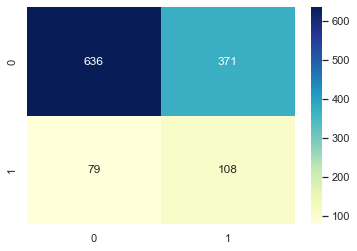

In [82]:
sn.heatmap(confusion_matrix,annot=True,fmt='d',cmap="YlGnBu")

The confusion matrix shows 658+4 = 662 correct predictions and 88+1= 89 incorrect ones.

True Positives: 108

True Negatives: 636

False Positives: 371 (Type I error)

False Negatives: 79 ( Type II error)

In [85]:
cm = confusion_matrix

In [86]:
TN=cm[0,0]
TP=cm[1,1]
FN=cm[1,0]
FP=cm[0,1]
sensitivity=TP/float(TP+FN)
specificity=TN/float(TN+FP)

In [87]:
print('The acuuracy of the model = TP+TN/(TP+TN+FP+FN) = ',(TP+TN)/float(TP+TN+FP+FN),'\n',

'The Missclassification = 1-Accuracy = ',1-((TP+TN)/float(TP+TN+FP+FN)),'\n',

'Sensitivity or True Positive Rate = TP/(TP+FN) = ',TP/float(TP+FN),'\n',

'Specificity or True Negative Rate = TN/(TN+FP) = ',TN/float(TN+FP),'\n',

'Positive Predictive value = TP/(TP+FP) = ',TP/float(TP+FP),'\n',

'Negative predictive Value = TN/(TN+FN) = ',TN/float(TN+FN),'\n',

'Positive Likelihood Ratio = Sensitivity/(1-Specificity) = ',sensitivity/(1-specificity),'\n',

'Negative likelihood Ratio = (1-Sensitivity)/Specificity = ',(1-sensitivity)/specificity)

The acuuracy of the model = TP+TN/(TP+TN+FP+FN) =  0.6231155778894473 
 The Missclassification = 1-Accuracy =  0.37688442211055273 
 Sensitivity or True Positive Rate = TP/(TP+FN) =  0.5775401069518716 
 Specificity or True Negative Rate = TN/(TN+FP) =  0.631578947368421 
 Positive Predictive value = TP/(TP+FP) =  0.2254697286012526 
 Negative predictive Value = TN/(TN+FN) =  0.8895104895104895 
 Positive Likelihood Ratio = Sensitivity/(1-Specificity) =  1.5676088617265085 
 Negative likelihood Ratio = (1-Sensitivity)/Specificity =  0.6688948306595366


In [83]:
# Undersampling Techiniques